In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading in the respective datasets
#### Step 1

In [3]:
all_sites=pd.read_csv('all_sites_scores.csv')

all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [4]:
fandango=pd.read_csv('fandango_scrape.csv')

fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


## Exploring Fandango dataset
#### step 2

In [5]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [6]:
fandango.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES'], dtype='object')

In [7]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [8]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

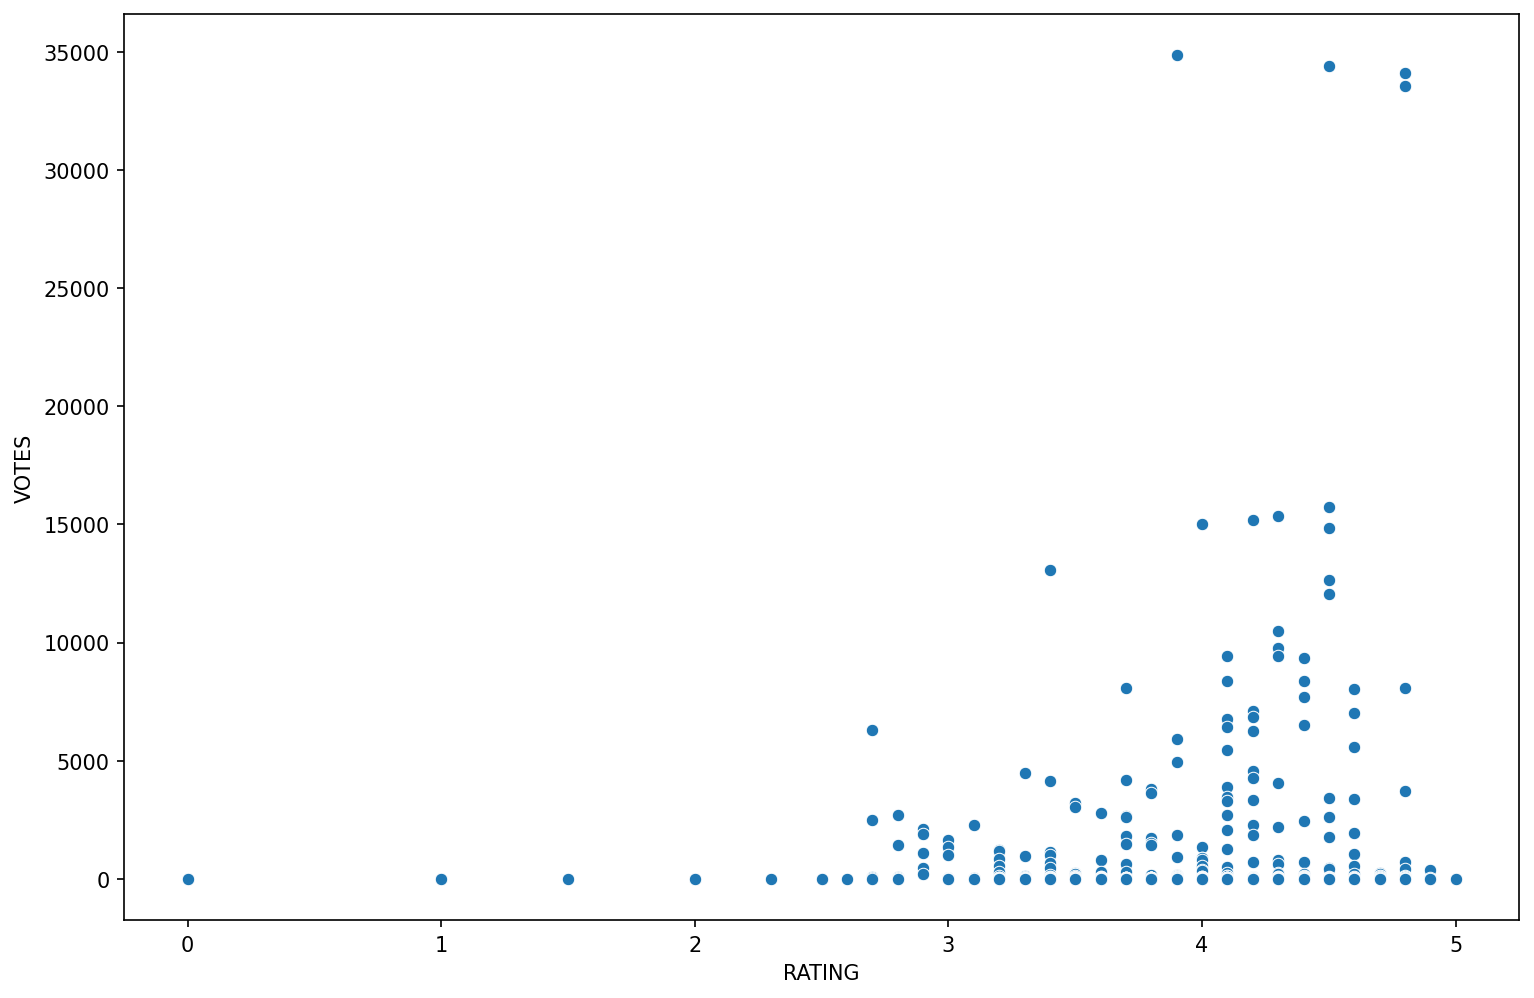

In [18]:
#plot of rating vs votes
plt.figure(figsize=(12, 8), dpi=150)
sns.scatterplot(data=fandango, x='RATING', y='VOTES')

In [9]:
#correlation between the columns
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [10]:
#creating a column from the film title a year of the movie
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [14]:
def get_year(col):
    year_with_brace=col.split('(')[1]
    return year_with_brace.replace(')', '')

In [15]:
fandango['YEAR']=fandango['FILM'].apply(lambda x:get_year(x))

In [16]:
fandango.YEAR

0      2015
1      2015
2      2015
3      2015
4      2015
       ... 
499    2015
500    2015
501    2015
502    1964
503    2012
Name: YEAR, Length: 504, dtype: object

In [17]:
#same work but with transform by the same get_year function
fandango['YEAR_x']=fandango['FILM'].transform(lambda x:get_year(x))

In [19]:
fandango.YEAR_x

0      2015
1      2015
2      2015
3      2015
4      2015
       ... 
499    2015
500    2015
501    2015
502    1964
503    2012
Name: YEAR_x, Length: 504, dtype: object

In [20]:
#dropping the column created by the transform
fandango.drop('YEAR_x', axis=1, inplace=True)

In [26]:
#doing the same thing with regular expressions
import re
def get_year_regex(col):
    regex = re.compile('\(\d+')
    year_with_braces=regex.findall(col)[0]
    return year_with_braces.replace('(', '').replace(')', '')
    


In [37]:
fandango['year_regx']=fandango['FILM'].apply(lambda x:get_year_regex(x))

In [30]:
fandango['year_regx']

0      2015
1      2015
2      2015
3      2015
4      2015
       ... 
499    2015
500    2015
501    2015
502    1964
503    2012
Name: year_regx, Length: 504, dtype: object

In [38]:
#this works that is why I use this one
fandango['year_regx'].unique()

array(['2015', '2014', '2016', '1964', '2012'], dtype=object)

In [39]:
#dropping the column created from the regex
fandango.drop('YEAR', axis=1, inplace=True)

In [44]:
fandango.rename(columns={'year_regx':'YEAR'}, inplace=True)

In [45]:
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [47]:
#Grouping by year to find out number of movies per year

In [48]:
fandango.groupby('YEAR')['FILM'].count()

YEAR
1964      1
2012      1
2014     24
2015    477
2016      1
Name: FILM, dtype: int64

In [51]:
#Count Movies per year and plot this in a plot

<AxesSubplot:xlabel='YEAR', ylabel='count'>

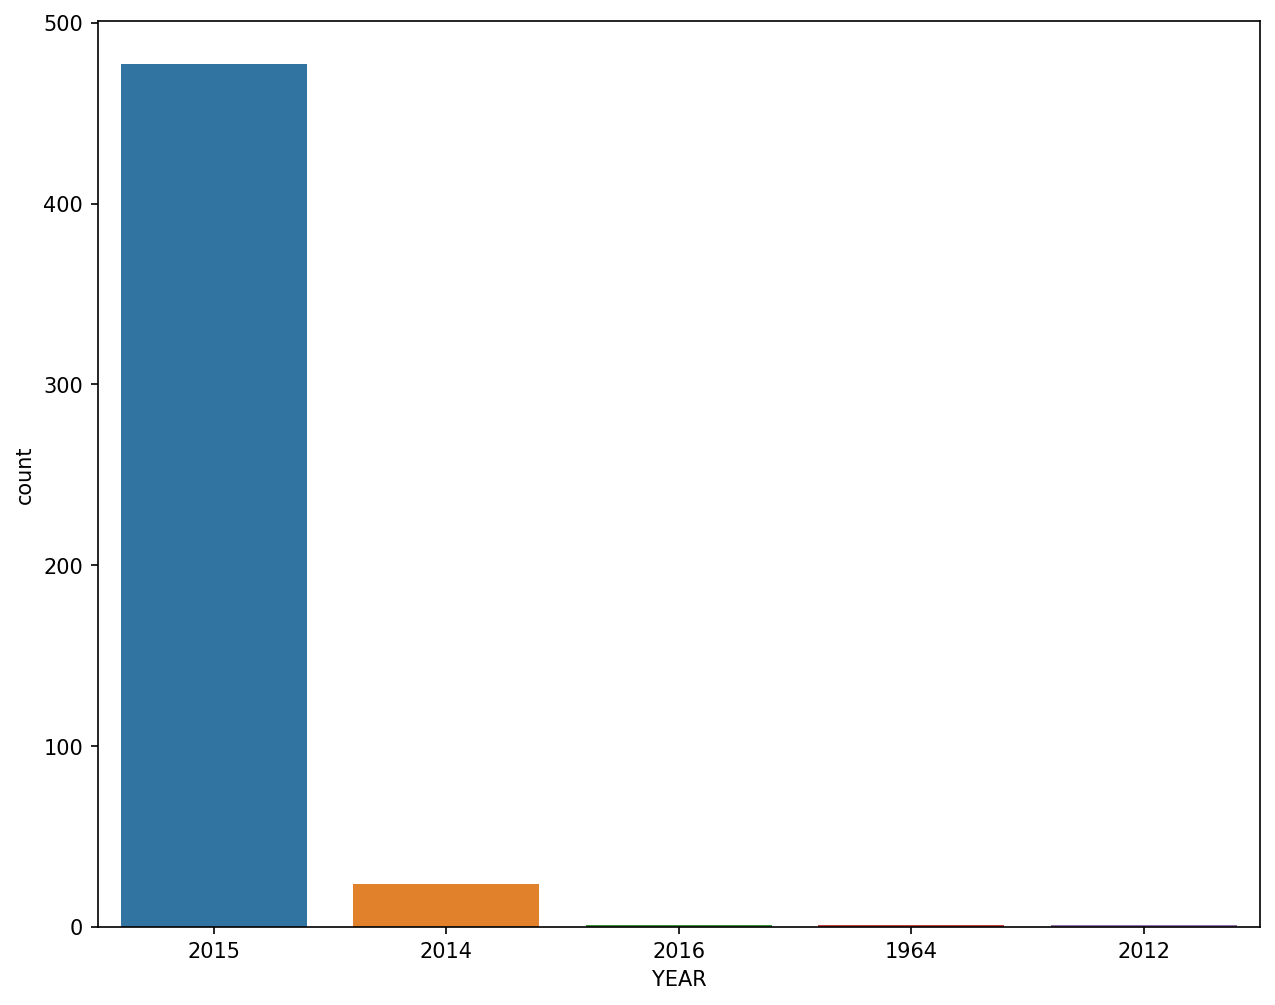

In [52]:
plt.figure(figsize=(10, 8), dpi=150)
sns.countplot(data=fandango, x='YEAR')

In [53]:
# return the top ten movies with the most votes

In [54]:
#writing a general function to sort by a given values
def top(data, column, n=10):
    return data.sort_values(by=column)[-n:]

In [55]:
#top ten movies with most votes
top(fandango, 'VOTES', 10)

,FILM,STARS,RATING,VOTES,YEAR
9,Into the Woods (2014),3.5,3.4,13055,2014
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
7,Minions (2015),4.0,4.0,14998,2015
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
4,Inside Out (2015),4.5,4.5,15749,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
2,American Sniper (2015),5.0,4.8,34085,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015


In [56]:
#Movies with zero votes

In [59]:
fandango[fandango['VOTES']==0].count()

FILM      69
STARS     69
RATING    69
VOTES     69
YEAR      69
dtype: int64

In [60]:
# Removing movies with no votes

In [61]:
#this does the job
fandango=fandango[fandango['VOTES']!=0]

In [ ]:
#create a KDE plot of both the START and Ratings

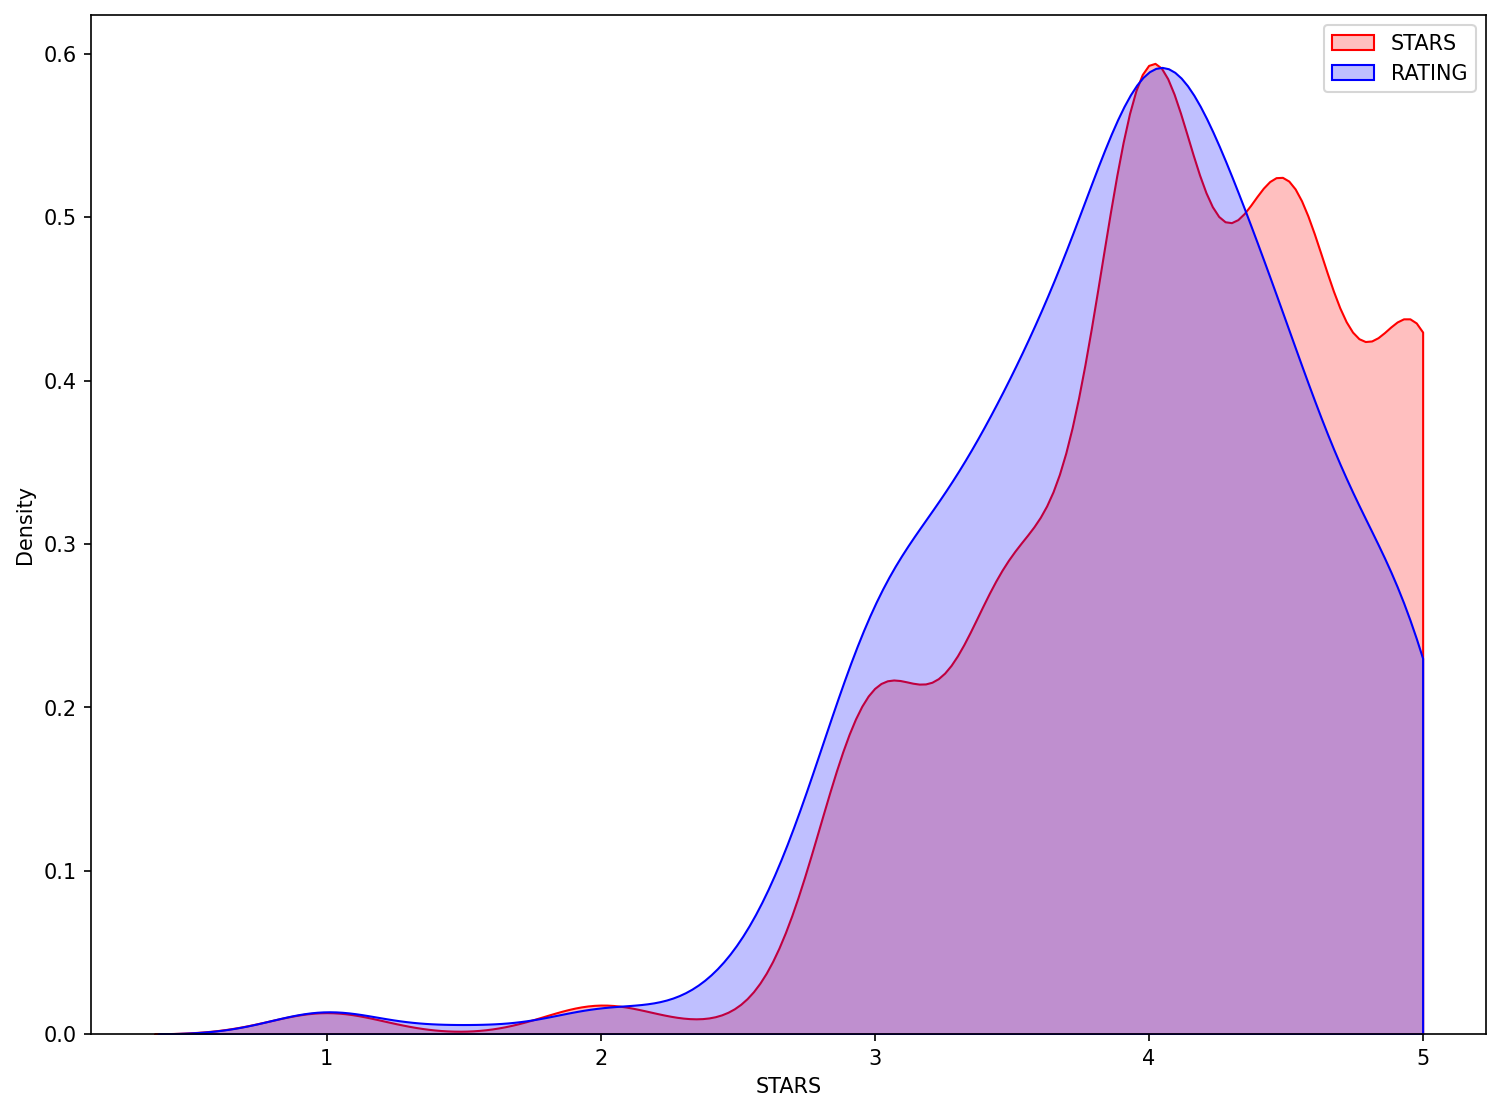

In [74]:
plt.figure(figsize=(12, 9), dpi=150)
sns.kdeplot(data=fandango,x='STARS',shade=True,color='red', clip=[0,5], legend=True)
sns.kdeplot(data=fandango,x='RATING',shade=True,color='blue',clip=[0,5], legend=True)
plt.legend(['STARS', 'RATING'])

In [75]:
# CREATING A COLUMN TO QUANTIFY THE DIFFERECNCE BETWEEN STARS AND RATING

In [77]:
#first change columns to numeric so that we can do numeric computation
fandango['STARS']=pd.to_numeric(fandango['STARS'])
fandango['VOTES']=pd.to_numeric(fandango['VOTES'])

C:\Users\Laterite\AppData\Local\Temp/ipykernel_12080/3425045792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango['STARS']=pd.to_numeric(fandango['STARS'])
C:\Users\Laterite\AppData\Local\Temp/ipykernel_12080/3425045792.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango['VOTES']=pd.to_numeric(fandango['VOTES'])


In [78]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435 entries, 0 to 434
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    435 non-null    object 
 1   STARS   435 non-null    float64
 2   RATING  435 non-null    float64
 3   VOTES   435 non-null    int64  
 4   YEAR    435 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 20.4+ KB


In [79]:
#creating a new column for the differnce between this two columns(absolure value)
fandango['Diff']=fandango['STARS']-fandango['RATING']

C:\Users\Laterite\AppData\Local\Temp/ipykernel_12080/865025593.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango['Diff']=fandango['STARS']-fandango['RATING']


In [88]:
#rounding the numbers to one decimal place
fandango['Diff']=fandango['Diff'].round(1)

C:\Users\Laterite\AppData\Local\Temp/ipykernel_12080/4009845348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango['Diff']=fandango['Diff'].round(1)


<AxesSubplot:xlabel='Diff', ylabel='count'>

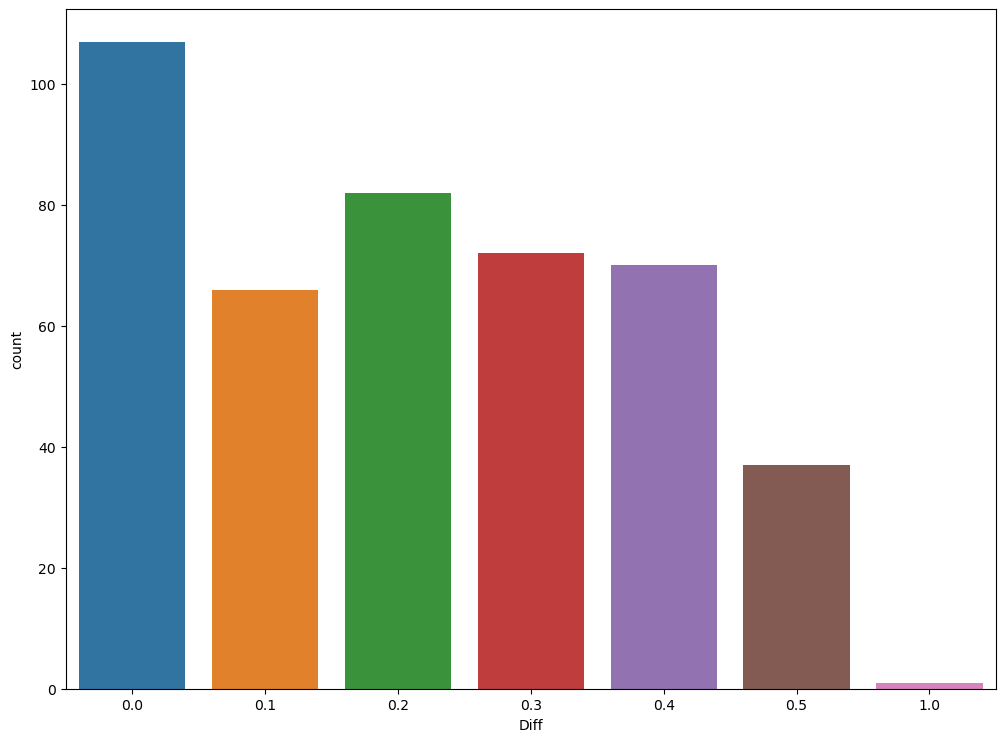

In [89]:
plt.figure(figsize=(12, 9), dpi=100)
sns.countplot(data=fandango, x='Diff')

In [90]:
#what is movie with the biggest differnce

In [93]:
#returning the movie with the biggest differnce
fandango.nlargest(1, 'Diff')

,FILM,STARS,RATING,VOTES,YEAR,Diff
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


In [94]:
#returning the biggest 3
fandango.nlargest(3, 'Diff')

,FILM,STARS,RATING,VOTES,YEAR,Diff
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015,0.5
10,Cinderella (2015),5.0,4.5,12640,2015,0.5


## Comparing Fandango Rating to other sites

In [95]:
#reading the dataset that contains rating from the other sites
all_sites=pd.read_csv('all_sites_scores.csv')

In [99]:
#exploring the dataset a bit

In [96]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [97]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [98]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


In [101]:
all_sites.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Metacritic_user_vote_count',
       'IMDB_user_vote_count'],
      dtype='object')

In [102]:
#exploring the relationship between rotten tomatoe users and revies with scatter plot

### Rotten Tomatoes

Text(0.5, 1.0, 'Rotten Tomatoe User Vs Critics')

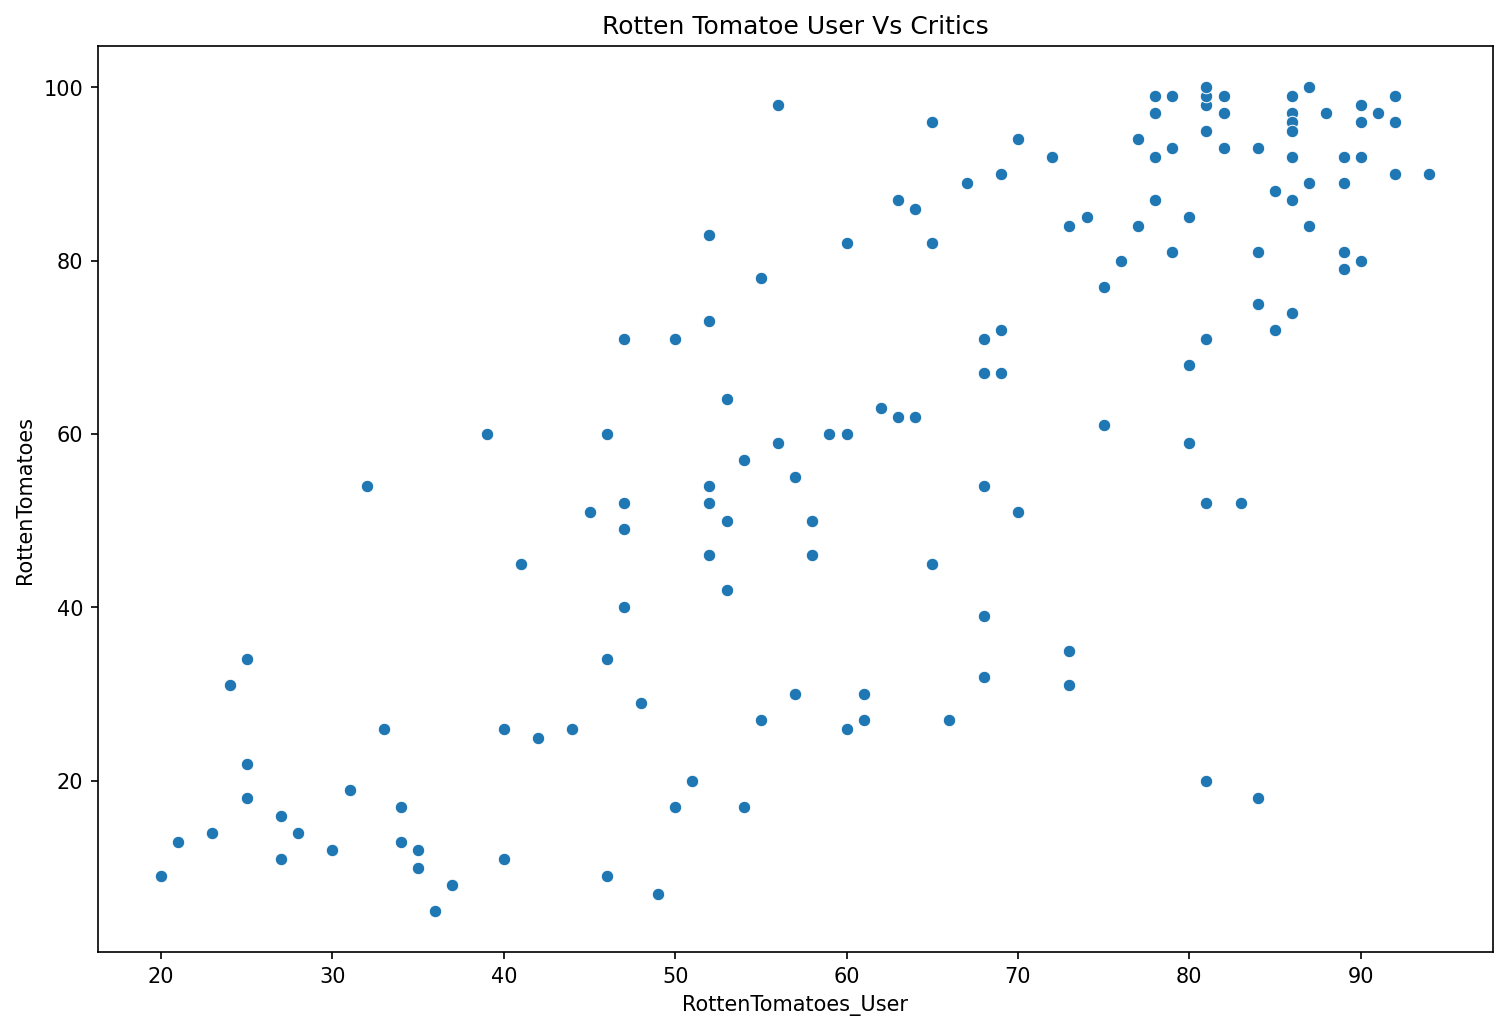

In [125]:
plt.figure(figsize=(12, 8), dpi=150)
sns.scatterplot(data=all_sites, x='RottenTomatoes_User', y='RottenTomatoes')
plt.title('Rotten Tomatoe User Vs Critics')

In [105]:
# create a column quantifying the difference betweent Rotten tomatoes users and critcs

In [107]:
all_sites['Rotten_Tommatoe_Diff']=all_sites['RottenTomatoes']-all_sites['RottenTomatoes_User']

Text(0.5, 1.0, 'Rotten Tomatoes differnce between critic and user Review')

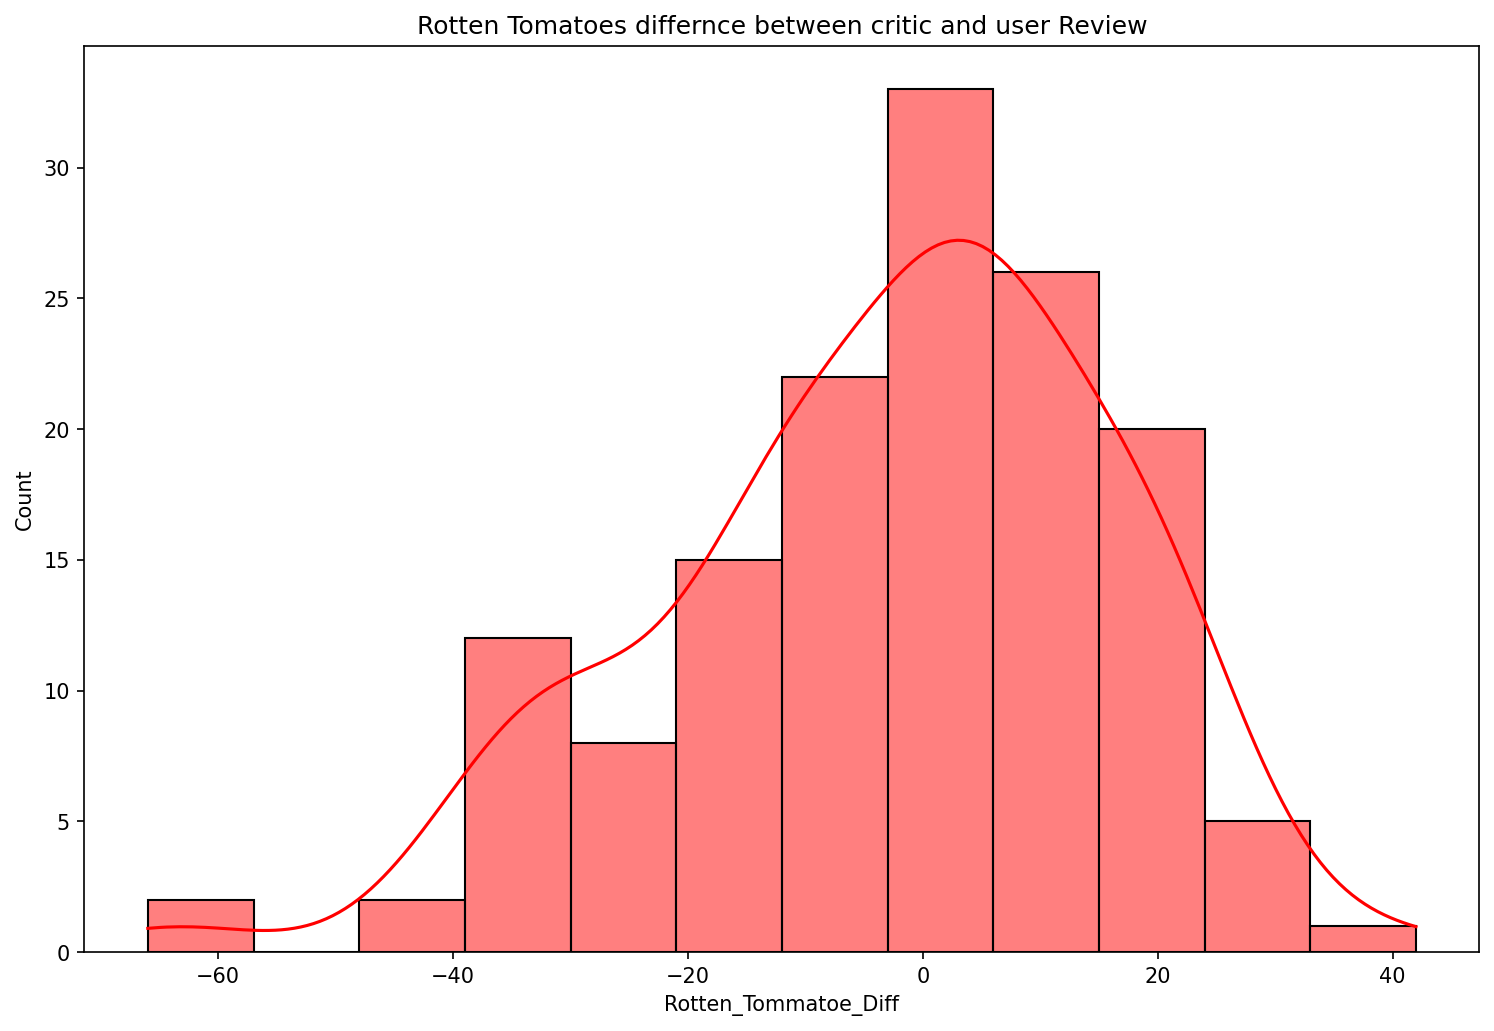

In [112]:
#ploting the difference in a histogram and kde
plt.figure(figsize=(12,8), dpi=150)
sns.histplot(data=all_sites, x='Rotten_Tommatoe_Diff', kde=True, color='red')
plt.title('Rotten Tomatoes differnce between critic and user Review')

In [113]:
# now checking absolute value differnce that is more
all_sites['Rotten_Tommatoe_Diff']=all_sites['Rotten_Tommatoe_Diff'].abs()

In [114]:
#checking
all_sites[all_sites['Rotten_Tommatoe_Diff']<0]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Tommatoe_Diff


Text(0.5, 1.0, 'Absolute differnce of Rotten Tomatoes Reviews')

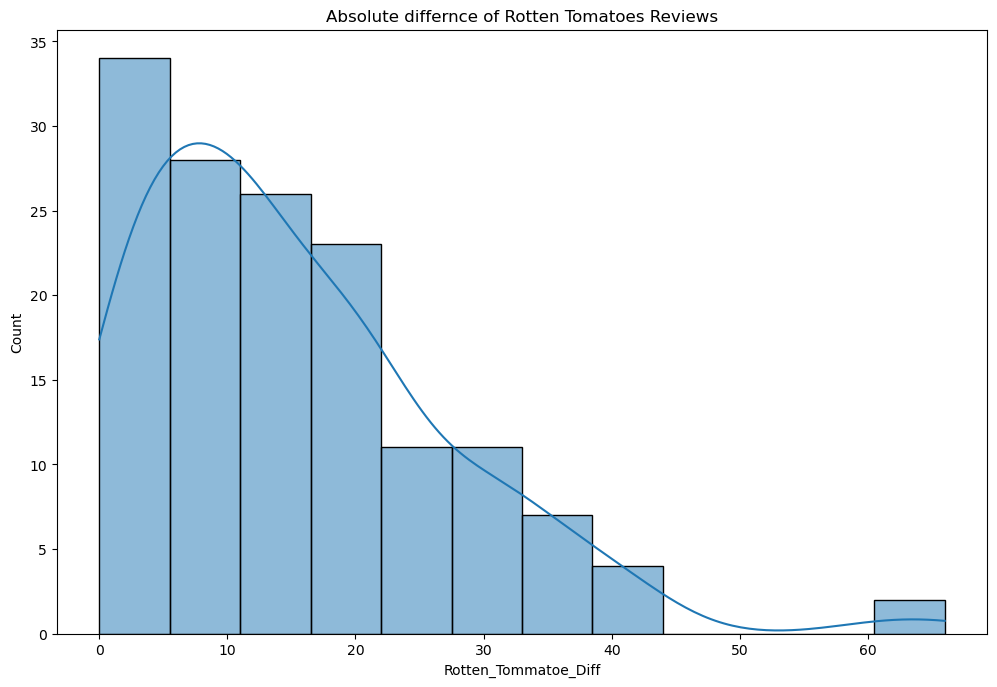

In [118]:
plt.figure(figsize=(12, 8), dpi=100)
sns.histplot(data=all_sites, x='Rotten_Tommatoe_Diff', kde=True)
plt.title('Absolute differnce of Rotten Tomatoes Reviews')

In [119]:
#movies with largest difference between critics and users from Roten Tomatoes
all_sites.nlargest(5, 'Rotten_Tommatoe_Diff')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Tommatoe_Diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,66
85,Little Boy (2015),20,81,30,5.9,7.4,38,5927,61
69,Mr. Turner (2014),98,56,94,6.6,6.9,98,13296,42
105,Hitman: Agent 47 (2015),7,49,28,3.3,5.9,67,4260,42
134,The Longest Ride (2015),31,73,33,4.8,7.2,49,25214,42


In [120]:
# now real differnce (including positive or negative)
all_sites['Rotten_Tommatoe_Diff_real']=all_sites['RottenTomatoes']-all_sites['RottenTomatoes_User']

In [121]:
#5 movies with higher critic rating than user
all_sites.nsmallest(5, 'Rotten_Tommatoe_Diff_real')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Tommatoe_Diff,Rotten_Tommatoe_Diff_real
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,66,-66
85,Little Boy (2015),20,81,30,5.9,7.4,38,5927,61,-61
105,Hitman: Agent 47 (2015),7,49,28,3.3,5.9,67,4260,42,-42
134,The Longest Ride (2015),31,73,33,4.8,7.2,49,25214,42,-42
125,The Wedding Ringer (2015),27,66,35,3.3,6.7,126,37292,39,-39


In [122]:
#5 movies with lowest critic rating than user
all_sites.nlargest(5, 'Rotten_Tommatoe_Diff_real')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Tommatoe_Diff,Rotten_Tommatoe_Diff_real
69,Mr. Turner (2014),98,56,94,6.6,6.9,98,13296,42,42
112,It Follows (2015),96,65,83,7.5,6.9,551,64656,31,31
115,While We're Young (2015),83,52,76,6.7,6.4,65,17647,31,31
37,Welcome to Me (2015),71,47,67,6.9,5.9,33,8301,24,24
40,I'll See You In My Dreams (2015),94,70,75,6.9,6.9,14,1151,24,24


### Metacritic

In [124]:
all_sites.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Metacritic_user_vote_count',
       'IMDB_user_vote_count', 'Rotten_Tommatoe_Diff',
       'Rotten_Tommatoe_Diff_real'],
      dtype='object')

Text(0.5, 1.0, 'Metacritic User Vs Critics')

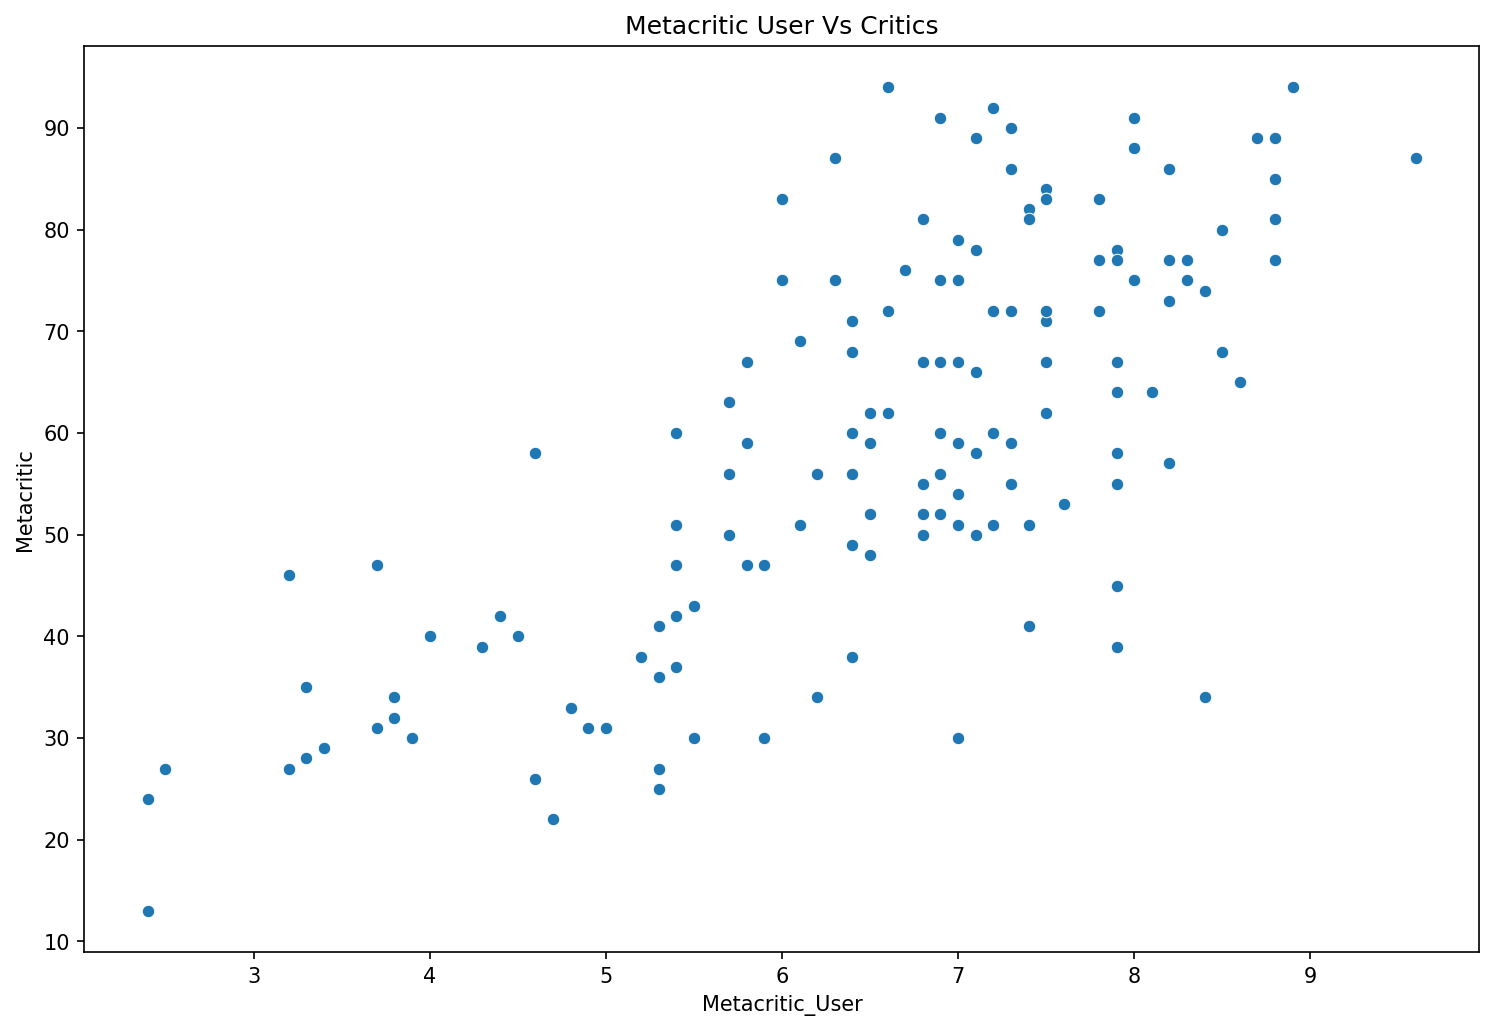

In [127]:
plt.figure(figsize=(12, 8), dpi=150)
sns.scatterplot(data=all_sites, x='Metacritic_User', y='Metacritic')
plt.title('Metacritic User Vs Critics')

In [128]:
#metacritic absolute differnce between user and critic 
all_sites['Metacritic_differnce_abs']=all_sites['Metacritic_User']-all_sites['Metacritic']
all_sites['Metacritic_differnce_abs']=all_sites['Metacritic_differnce_abs'].abs()

In [130]:
all_sites['Metacritic_differnce_abs'].describe()

count    146.000000
mean      52.289041
std       18.453947
min       10.600000
25%       37.525000
50%       52.250000
75%       68.075000
max       87.400000
Name: Metacritic_differnce_abs, dtype: float64

### Vote counts

In [132]:
all_sites.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Metacritic_user_vote_count',
       'IMDB_user_vote_count', 'Rotten_Tommatoe_Diff',
       'Rotten_Tommatoe_Diff_real', 'Metacritic_differnce_abs'],
      dtype='object')

Text(0.5, 1.0, 'IMDB  Vs Metacritic User Count')

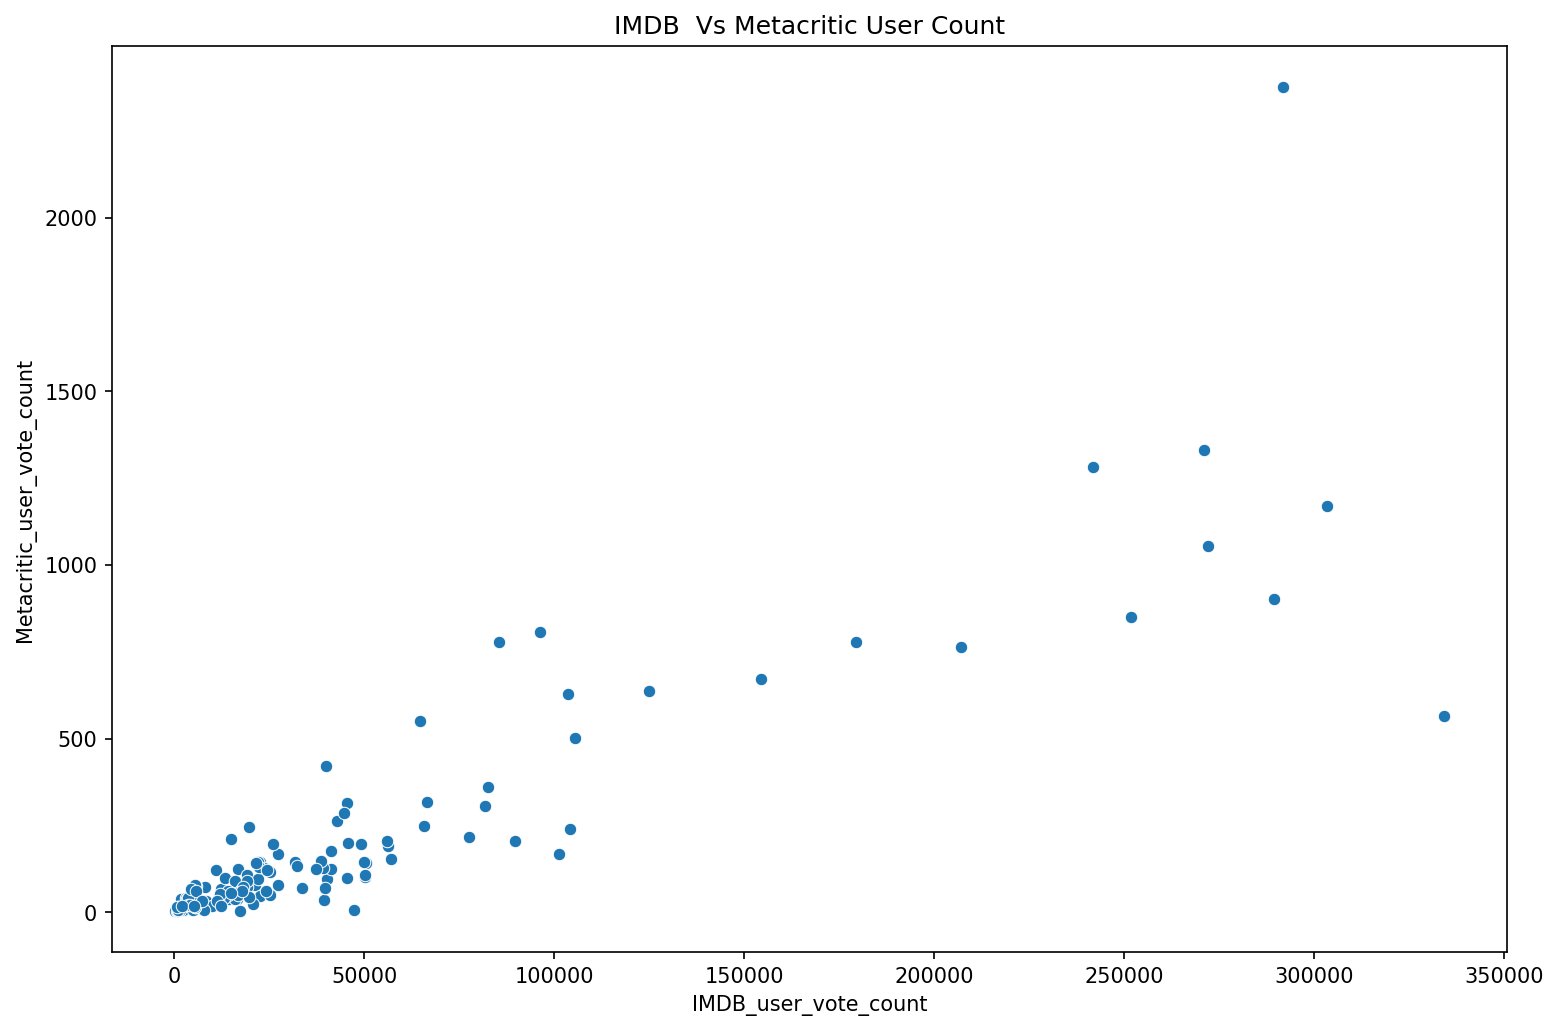

In [133]:
plt.figure(figsize=(12, 8), dpi=150)
sns.scatterplot(data=all_sites, x='IMDB_user_vote_count', y='Metacritic_user_vote_count')
plt.title('IMDB  Vs Metacritic User Count')

In [134]:
## movie with highest IMDB user vote count
all_sites.nlargest(1, 'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Tommatoe_Diff,Rotten_Tommatoe_Diff_real,Metacritic_differnce_abs
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,2,-2,64.8


In [135]:
## movie with highest metacritic user vote count
all_sites.nlargest(1, 'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Tommatoe_Diff,Rotten_Tommatoe_Diff_real,Metacritic_differnce_abs
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9,9,80.3


## Fandango vs all_sites Critic Reviews

In [138]:
# exploring before merging

In [136]:
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR,Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0


In [137]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Tommatoe_Diff,Rotten_Tommatoe_Diff_real,Metacritic_differnce_abs
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,12,-12,58.9
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5,5,59.5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,10,-10,55.9
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,66,-66,17.3
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,14,-14,25.6


In [139]:
#merging the two datasets on FILM and keeping only the movies in both the datasets
data_all=pd.merge(fandango, all_sites, on='FILM', how='inner')

In [140]:
#exploring the new dataset
data_all.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'YEAR', 'Diff', 'RottenTomatoes',
       'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB',
       'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'Rotten_Tommatoe_Diff', 'Rotten_Tommatoe_Diff_real',
       'Metacritic_differnce_abs'],
      dtype='object')

In [142]:
#exploring relvevant similar columns from fandango and the other sites
data_all[['STARS', 'RATING', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB']].describe()

,STARS,RATING,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,4.086207,3.841379,60.634483,63.696552,58.696552,6.508966,6.729655
std,0.541169,0.502437,30.161098,19.974749,19.538183,1.510883,0.957944
min,3.000000,2.700000,5.000000,20.000000,13.000000,2.400000,4.000000
25%,3.500000,3.500000,31.000000,50.000000,43.000000,5.700000,6.300000
50%,4.000000,3.900000,63.000000,66.000000,59.000000,6.800000,6.900000
75%,4.500000,4.200000,89.000000,81.000000,75.000000,7.500000,7.400000
max,5.000000,4.800000,100.000000,94.000000,94.000000,9.600000,8.600000


#### Normalizing the columns to the same units

In [143]:
#normalizing columns 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB'
#so that these are from 0-5 like the datasets from fandango

In [145]:
#Rotten tomatoes from from 0-100
#dividing the columns by 100 and multiplying by 5 so that a 100 become 10(hence dividing by20)
data_all['RottenTomatoes']=data_all['RottenTomatoes']/20
data_all['RottenTomatoes_User']=data_all['RottenTomatoes_User']/20

In [146]:
#Metacritic from from 0-100
#dividing the columns by 100 and multiplying by 5 so that a 100 become 10(hence dividing by20)
data_all['Metacritic']=data_all['Metacritic']/20
data_all['Metacritic_User']=data_all['Metacritic_User']/20

In [149]:
#erros with metacrictic_user this ranges from 0 to 100
data_all['Metacritic_User']=data_all['Metacritic_User']*10

In [147]:
#IMDB from from 0-10
#dividing the columns by 10 and multiplying by 5 so that a 10 become 5(hence dividing by2)
data_all['IMDB']=data_all['IMDB']/2

In [150]:
#exploring again after changes relvevant similar columns from fandango and the other sites
data_all[['STARS', 'RATING', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB']].describe()

,STARS,RATING,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,4.086207,3.841379,3.031724,3.184828,2.934828,3.254483,3.364828
std,0.541169,0.502437,1.508055,0.998737,0.976909,0.755441,0.478972
min,3.000000,2.700000,0.250000,1.000000,0.650000,1.200000,2.000000
25%,3.500000,3.500000,1.550000,2.500000,2.150000,2.850000,3.150000
50%,4.000000,3.900000,3.150000,3.300000,2.950000,3.400000,3.450000
75%,4.500000,4.200000,4.450000,4.050000,3.750000,3.750000,3.700000
max,5.000000,4.800000,5.000000,4.700000,4.700000,4.800000,4.300000


In [151]:
#creating a new column with only the reviws
ratings=data_all[['STARS', 'RATING', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB']]

### Comparing the ratings across sites


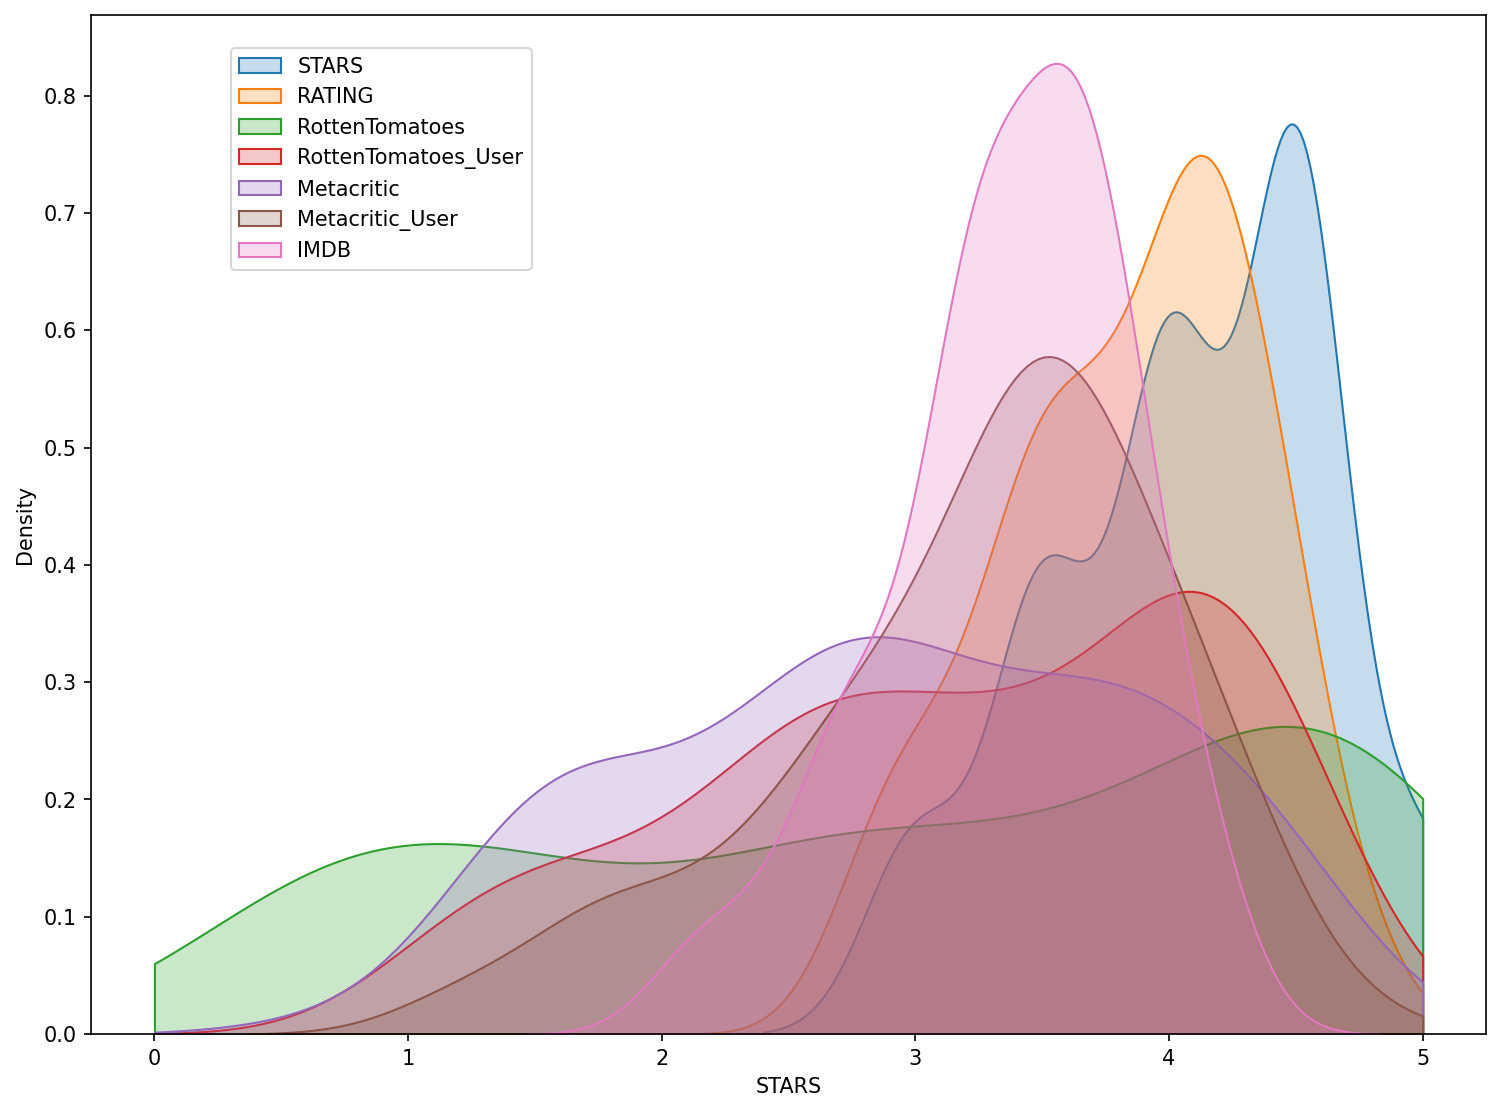

In [161]:
#kde plots
plt.figure(figsize=(12, 9), dpi=150)
sns.kdeplot(data=ratings,x='STARS',shade=True, clip=[0,5], legend=True)
sns.kdeplot(data=ratings,x='RATING',shade=True,clip=[0,5], legend=True)
sns.kdeplot(data=ratings,x='RottenTomatoes',shade=True, clip=[0,5], legend=True)
sns.kdeplot(data=ratings,x='RottenTomatoes_User',shade=True,clip=[0,5], legend=True)
sns.kdeplot(data=ratings,x='Metacritic',shade=True, clip=[0,5], legend=True)
sns.kdeplot(data=ratings,x='Metacritic_User',shade=True,clip=[0,5], legend=True)
sns.kdeplot(data=ratings,x='IMDB',shade=True,clip=[0,5], legend=True)
plt.legend(['STARS', 'RATING', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB'], loc=(0.1, 0.75))


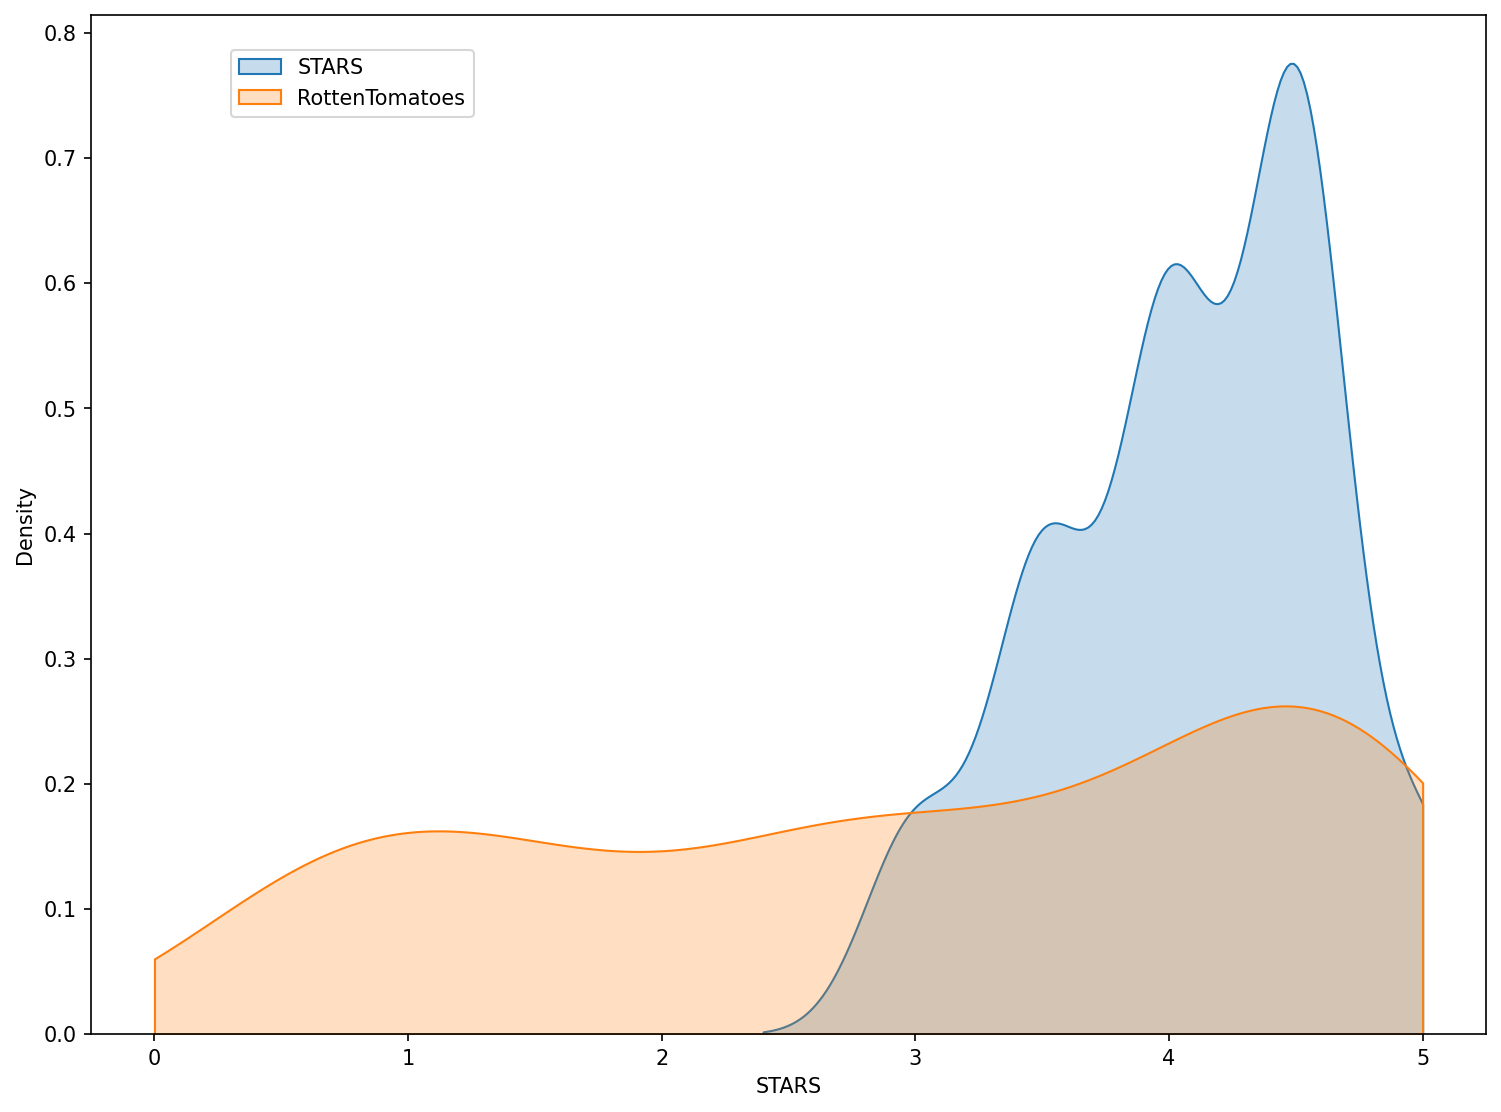

In [164]:
# between rotten tomatoes and fandango
plt.figure(figsize=(12, 9), dpi=150)
sns.kdeplot(data=ratings,x='STARS',shade=True,clip=[0,5], legend=True)
sns.kdeplot(data=ratings,x='RottenTomatoes',shade=True,clip=[0,5], legend=True)
plt.legend(['STARS', 'RottenTomatoes'], loc=(0.1, 0.9))

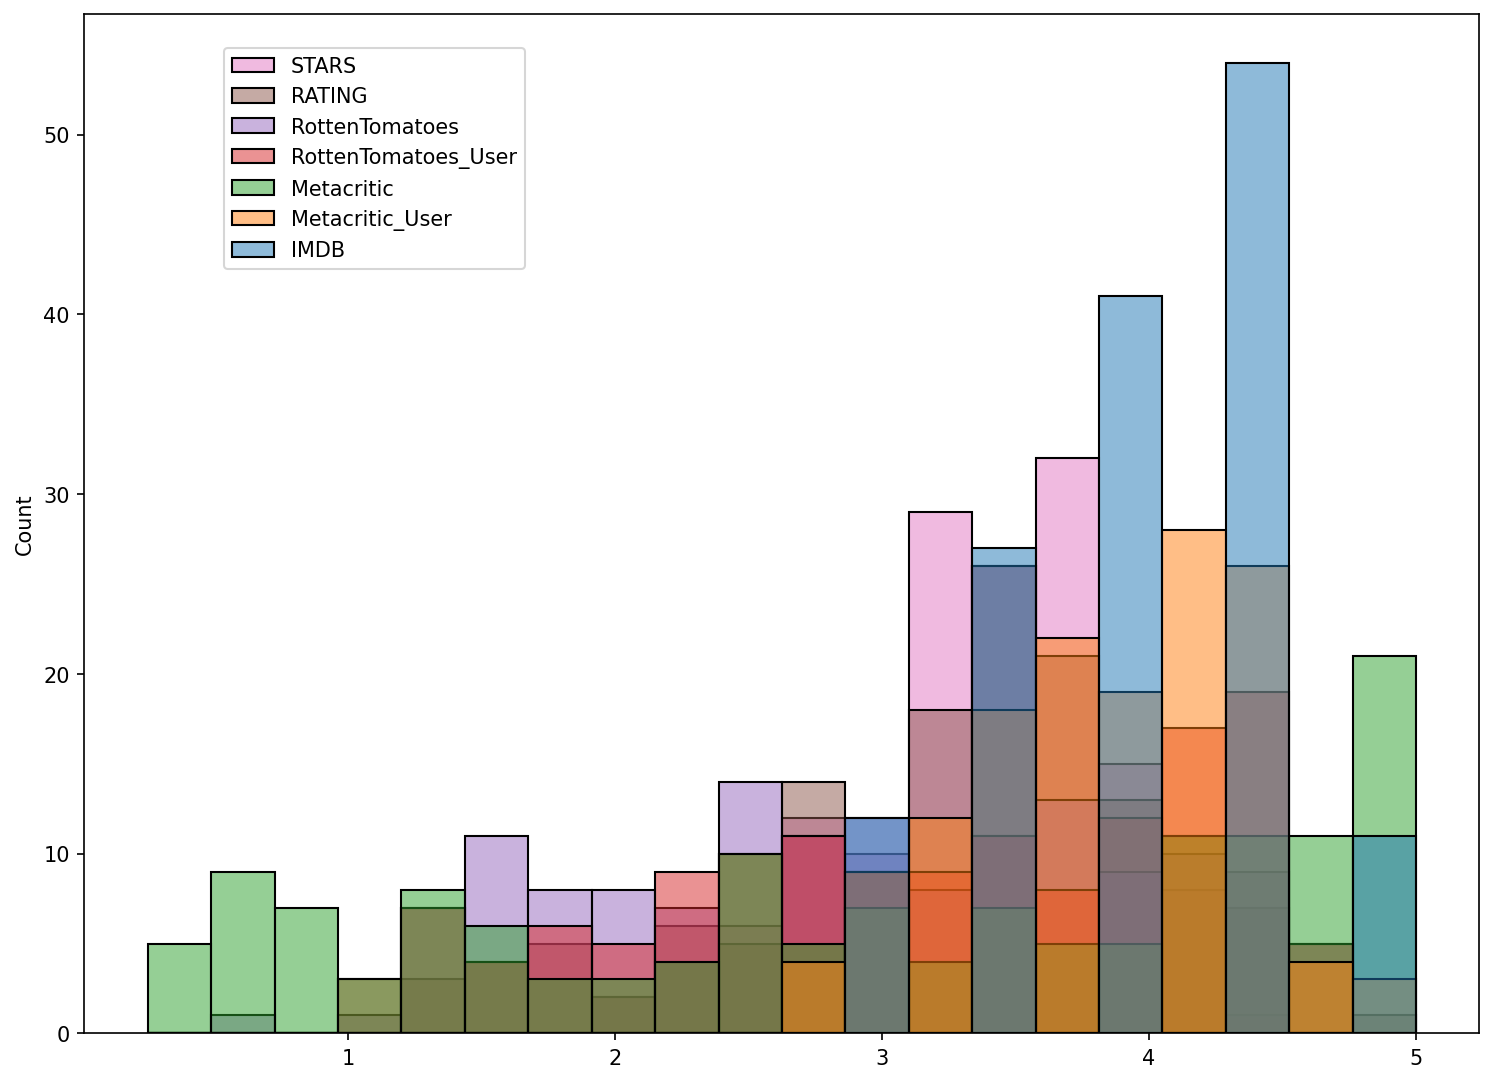

In [173]:
#histogram plots
plt.figure(figsize=(12, 9), dpi=150)
sns.histplot(data=ratings)
# sns.histplot(data=ratings,x='RATING')
# sns.histplot(data=ratings,x='RottenTomatoes')
# sns.histplot(data=ratings,x='RottenTomatoes_User')
# sns.histplot(data=ratings,x='Metacritic')
# sns.histplot(data=ratings,x='Metacritic_User')
# sns.histplot(data=ratings,x='IMDB')
plt.legend(['STARS', 'RATING', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB'], loc=(0.1, 0.75))


In [174]:
#cluster map

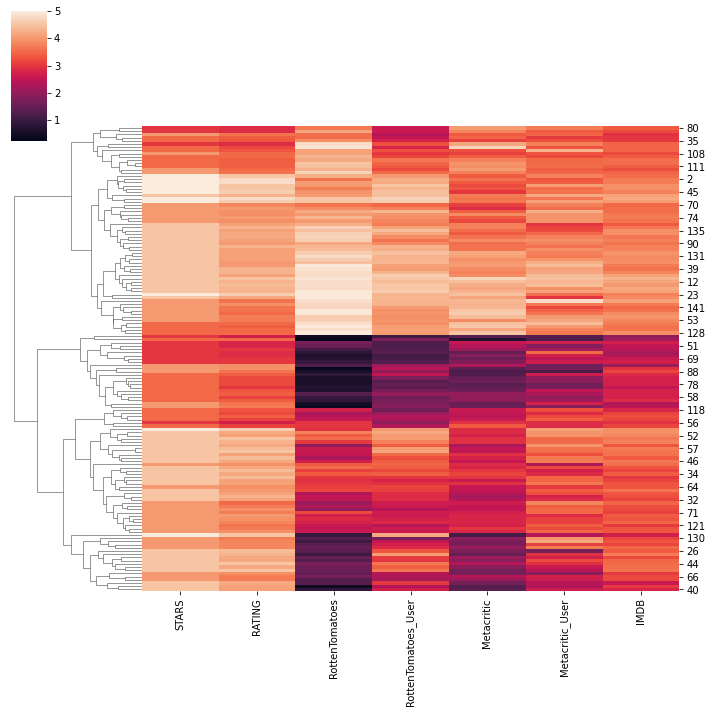

In [175]:
#to visualize the differnce between rating from fandango and other sites
sns.clustermap(data=ratings,col_cluster=False)

In [177]:
data_all

,FILM,STARS,RATING,VOTES,YEAR,Diff,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Tommatoe_Diff,Rotten_Tommatoe_Diff_real,Metacritic_differnce_abs
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,1.25,2.10,2.30,1.60,2.10,778,179506,17,-17,42.8
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,3.55,4.05,2.95,3.50,3.65,1281,241807,10,-10,52.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,3.60,4.25,3.60,3.30,3.70,850,251856,13,-13,65.4
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,4.05,4.20,3.35,3.40,3.70,764,207211,3,-3,60.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,4.90,4.50,4.70,4.45,4.30,807,96252,8,8,85.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,0.0,4.35,3.15,3.40,3.20,3.35,19,5289,24,24,61.6
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,0.4,4.75,4.05,4.35,3.15,3.50,18,1107,14,14,80.7
142,The Wrecking Crew (2015),4.5,4.2,38,2015,0.3,4.65,4.20,3.35,3.50,3.90,4,732,9,9,60.0
143,Tangerine (2015),4.0,3.9,36,2015,0.1,4.75,4.30,4.30,3.65,3.70,14,696,9,9,78.7


In [178]:
#worst movies according to the other sites

In [201]:
#Metacritic

lowest_meta=data_all.nsmallest(10, 'Metacritic')
data_all.nsmallest(10, 'Metacritic')

,FILM,STARS,RATING,VOTES,YEAR,Diff,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Tommatoe_Diff,Rotten_Tommatoe_Diff_real,Metacritic_differnce_abs
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,3054,2015,0.0,0.25,1.80,0.65,1.20,2.15,211,15004,31,-31,10.6
67,Do You Believe? (2015),5.0,4.5,1793,2015,0.5,0.90,4.20,1.10,2.35,2.70,31,3136,66,-66,17.3
88,The Loft (2015),4.0,3.6,811,2015,0.4,0.55,2.00,1.20,1.20,3.15,80,21319,29,-29,21.6
79,Strange Magic (2015),3.5,3.4,1117,2015,0.1,0.85,2.50,1.25,2.65,2.85,41,3658,33,-33,19.7
25,Taken 3 (2015),4.5,4.1,6757,2015,0.4,0.45,2.30,1.30,2.30,3.05,240,104235,37,-37,21.4
28,Fantastic Four (2015),3.0,2.7,6288,2015,0.3,0.45,1.00,1.35,1.25,2.00,421,39838,11,-11,24.5
40,Pixels (2015),4.5,4.1,3886,2015,0.4,0.85,2.70,1.35,2.65,2.80,246,19521,37,-37,21.7
78,Mortdecai (2015),3.5,3.2,1196,2015,0.3,0.60,1.50,1.35,1.60,2.75,144,31878,18,-18,23.8
84,Hitman: Agent 47 (2015),4.0,3.9,917,2015,0.1,0.35,2.45,1.40,1.65,2.95,67,4260,42,-42,24.7
81,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,2015,0.5,0.70,1.40,1.45,1.70,2.55,88,19560,14,-14,25.6


In [191]:
#IMDB
lowest_IMDB=data_all.nsmallest(10, 'IMDB')
data_all.nsmallest(10, 'IMDB')

,FILM,STARS,RATING,VOTES,YEAR,Diff,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Tommatoe_Diff,Rotten_Tommatoe_Diff_real,Metacritic_differnce_abs
28,Fantastic Four (2015),3.0,2.7,6288,2015,0.3,0.45,1.00,1.35,1.25,2.00,421,39838,11,-11,24.5
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,1.25,2.10,2.30,1.60,2.10,778,179506,17,-17,42.8
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,3054,2015,0.0,0.25,1.80,0.65,1.20,2.15,211,15004,31,-31,10.6
63,The Gallows (2015),3.0,2.9,1896,2015,0.1,0.80,1.35,1.50,3.50,2.20,80,5511,11,-11,23.0
50,The Boy Next Door (2015),4.0,3.6,2800,2015,0.4,0.50,1.75,1.50,2.75,2.30,75,19658,25,-25,24.5
109,The Vatican Tapes (2015),3.0,2.9,210,2015,0.1,0.65,1.05,1.85,2.70,2.30,5,952,8,-8,31.6
54,Hot Pursuit (2015),4.0,3.7,2618,2015,0.3,0.40,1.85,1.55,1.85,2.45,78,17061,29,-29,27.3
75,The Woman In Black 2 Angel of Death (2015),3.0,3.0,1333,2015,0.0,1.10,1.25,2.10,2.20,2.45,55,14873,3,-3,37.6
51,Poltergeist (2015),3.0,2.8,2704,2015,0.2,1.55,1.20,2.35,1.85,2.50,142,21372,7,7,43.3
81,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,2015,0.5,0.70,1.40,1.45,1.70,2.55,88,19560,14,-14,25.6


In [183]:
#Rotten Tomatoes
lowest_rotten=data_all.nsmallest(10, 'RottenTomatoes')
data_all.nsmallest(10, 'RottenTomatoes')

,FILM,STARS,RATING,VOTES,YEAR,Diff,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Tommatoe_Diff,Rotten_Tommatoe_Diff_real,Metacritic_differnce_abs
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,3054,2015,0.0,0.25,1.80,0.65,1.20,2.15,211,15004,31,-31,10.6
84,Hitman: Agent 47 (2015),4.0,3.9,917,2015,0.1,0.35,2.45,1.40,1.65,2.95,67,4260,42,-42,24.7
54,Hot Pursuit (2015),4.0,3.7,2618,2015,0.3,0.40,1.85,1.55,1.85,2.45,78,17061,29,-29,27.3
25,Taken 3 (2015),4.5,4.1,6757,2015,0.4,0.45,2.30,1.30,2.30,3.05,240,104235,37,-37,21.4
28,Fantastic Four (2015),3.0,2.7,6288,2015,0.3,0.45,1.00,1.35,1.25,2.00,421,39838,11,-11,24.5
50,The Boy Next Door (2015),4.0,3.6,2800,2015,0.4,0.50,1.75,1.50,2.75,2.30,75,19658,25,-25,24.5
87,Unfinished Business (2015),3.5,3.2,821,2015,0.3,0.55,1.35,1.60,1.90,2.70,39,14346,16,-16,28.2
88,The Loft (2015),4.0,3.6,811,2015,0.4,0.55,2.00,1.20,1.20,3.15,80,21319,29,-29,21.6
77,Seventh Son (2015),3.5,3.2,1213,2015,0.3,0.60,1.75,1.50,1.95,2.75,126,41177,23,-23,26.1
78,Mortdecai (2015),3.5,3.2,1196,2015,0.3,0.60,1.50,1.35,1.60,2.75,144,31878,18,-18,23.8


<AxesSubplot:ylabel='Density'>

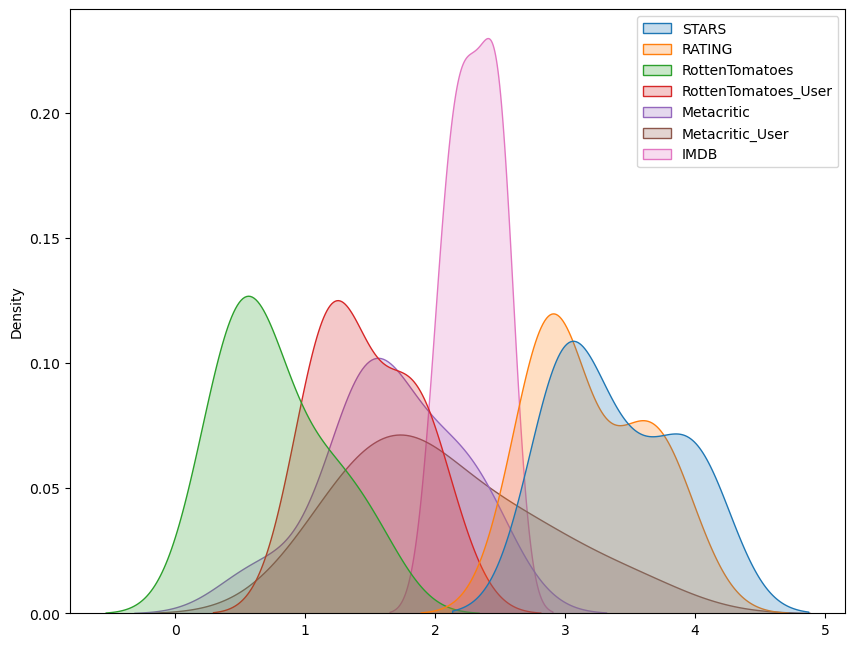

In [195]:
#same can be done for the others
plt.figure(figsize=(10, 8), dpi=100)
sns.kdeplot(data=lowest_IMDB[['STARS', 'RATING', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB']], shade=True)


<AxesSubplot:ylabel='Density'>

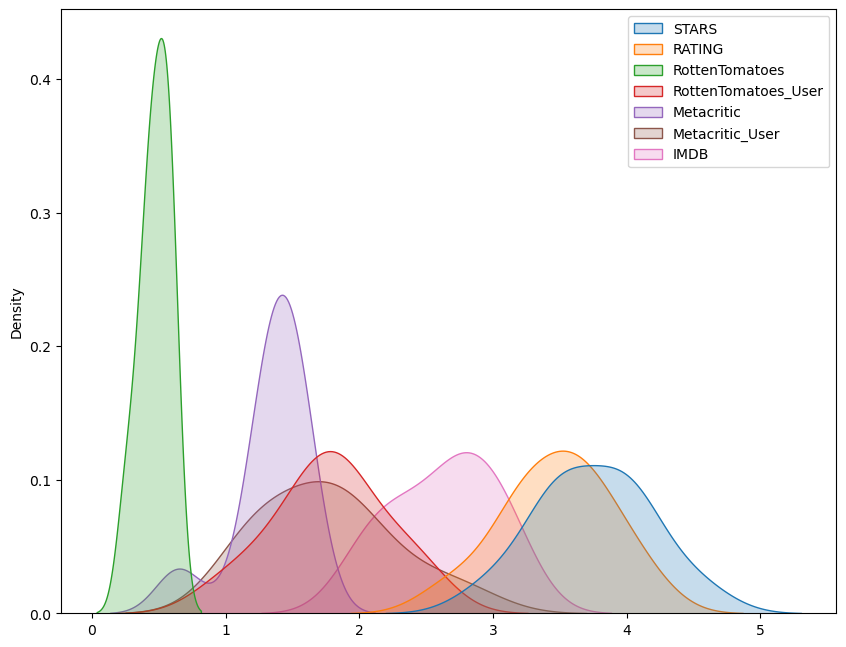

In [196]:
#same can be done for the others
plt.figure(figsize=(10, 8), dpi=100)
sns.kdeplot(data=lowest_rotten[['STARS', 'RATING', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB']], shade=True)


<AxesSubplot:ylabel='Density'>

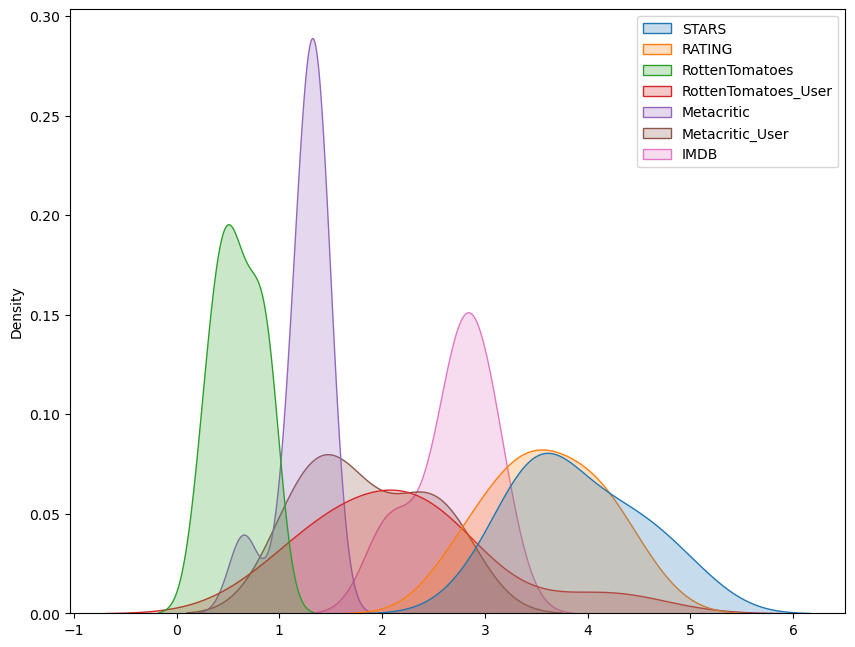

In [202]:
#same can be done for the others
plt.figure(figsize=(10, 8), dpi=100)
sns.kdeplot(data=lowest_meta[['STARS', 'RATING', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB']], shade=True)


In [190]:
#rating in fandango of worst rated on IMDB
data_all.nsmallest(1, 'IMDB')

,FILM,STARS,RATING,VOTES,YEAR,Diff,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Tommatoe_Diff,Rotten_Tommatoe_Diff_real,Metacritic_differnce_abs
28,Fantastic Four (2015),3.0,2.7,6288,2015,0.3,0.45,1.0,1.35,1.25,2.0,421,39838,11,-11,24.5


In [198]:
#rating in fandango of worst rated on RottenTomatoes
data_all.nsmallest(1, 'RottenTomatoes')

,FILM,STARS,RATING,VOTES,YEAR,Diff,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Tommatoe_Diff,Rotten_Tommatoe_Diff_real,Metacritic_differnce_abs
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,3054,2015,0.0,0.25,1.8,0.65,1.2,2.15,211,15004,31,-31,10.6


In [199]:
#rating in fandango of worst rated on Metacritic
data_all.nsmallest(1, 'Metacritic')

,FILM,STARS,RATING,VOTES,YEAR,Diff,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Tommatoe_Diff,Rotten_Tommatoe_Diff_real,Metacritic_differnce_abs
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,3054,2015,0.0,0.25,1.8,0.65,1.2,2.15,211,15004,31,-31,10.6


In [203]:
#no rating below 3 from fandango
data_all.min()

FILM                          '71 (2015)
STARS                                3.0
RATING                               2.7
VOTES                                 35
YEAR                                2014
Diff                                 0.0
RottenTomatoes                      0.25
RottenTomatoes_User                  1.0
Metacritic                          0.65
Metacritic_User                      1.2
IMDB                                 2.0
Metacritic_user_vote_count             4
IMDB_user_vote_count                 243
Rotten_Tommatoe_Diff                   0
Rotten_Tommatoe_Diff_real            -66
Metacritic_differnce_abs            10.6
dtype: object